# Tugas Pattern Recognition - Bayes Decision Rule

--------------------
Nama : Made Raharja Surya Mahadi

NIM : 23520022

---------------------
## Deskripsi Tugas
Diberikan sebuah data histogram sebagai berikut
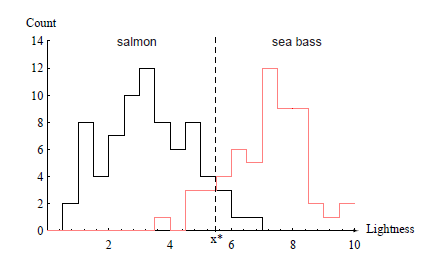

dimana pada histogram diatas terdapat informasi jumlah ikan salmon dan seabass berdasarkan lightnessnya. Dari data tersebut, tentukan apakah ikan yang berada pada interval tertentu adalah ikan salmon atau seabass menggunakan metode `Bayes Decision Rule berbasis Maximum Posterior Probability and Minimum Risk`

----------------
## Konversi Histogram ke Tabel
langkah pertama konversikan histogram diatas menjadi tabel, pada proses konversi disini saya menggunakan interval `0.5` untuk lighnessnya

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('data.csv')
dataset

,lightness,countSalmon,countSeabass
0,0-0.5,0,0
1,0.5-1,2,0
2,1-1.5,8,0
3,1.5-2,4,0
4,2-2.5,7,0
5,2.5-3,10,0
6,3-3.5,12,0
7,3.5-4,8,1
8,4-4.5,6,0
9,4.5-5,8,3


----------------
## Lakukan Preproses
langkah pertama adalah ambil data jumlah salmon dan seabass untuk tiap interval lightnessnya, lalu lakukan `add one smoothing` (laplace smoothing) untuk menghindari pembagian dengan `0`

In [37]:
count_salmon = np.array(dataset.countSalmon) + 1
count_seabass = np.array(dataset.countSeabass) + 1

### Hitung Probability tiap Kelas
pada proses ini, hitung probability untuk kelas salmon dan seabass dengan persamaan 

$ P(\omega_{i}) = \frac{N_{i}}{\sum N_{j}} $

In [57]:
# hitung probability salmon dan seabass
p_salmon = count_salmon.sum() / (count_salmon.sum() + count_seabass.sum())
p_seabass = count_seabass.sum() / (count_salmon.sum() + count_seabass.sum())

print('P(salmon):', p_salmon)
print('P(seabass):', p_seabass)

P(salmon): 0.5497076023391813
P(seabass): 0.4502923976608187


----
### Hitung Posterior Conditional Probability
selanjutnya hitung posterior conditional probability untuk kelas samlmon dan seabass dengan persamaan

$ P(\omega_{i}|x) = P(x|\omega_{i})P(\omega_{i}) $

yang dapat disederhanakan menjadi

$ P(\omega_{i}|x) = \frac{count(x, \omega_{i})}{N_{i}} $

In [59]:
# hitung posterior probability
posterior_salmon = count_salmon / count_salmon.sum()
posterior_seabass = count_seabass / count_seabass.sum()

print('Posterior Probability Salmon:')
print(posterior_salmon)
print('Posterior Probability Seabass:')
print(posterior_seabass)

Posterior Probability Salmon:
[0.0106383  0.03191489 0.09574468 0.05319149 0.08510638 0.11702128
 0.13829787 0.09574468 0.07446809 0.09574468 0.05319149 0.04255319
 0.0212766  0.0212766  0.0106383  0.0106383  0.0106383  0.0106383
 0.0106383  0.0106383 ]
Posterior Probability Seabass:
[0.01298701 0.01298701 0.01298701 0.01298701 0.01298701 0.01298701
 0.01298701 0.02597403 0.01298701 0.05194805 0.05194805 0.06493506
 0.09090909 0.07792208 0.16883117 0.12987013 0.12987013 0.03896104
 0.02597403 0.03896104]


---
### Conditional Risk
Selanjutnya mendefinisikan conditional risk, terdapat 2 action yaitu $\alpha_{1}$ artinya pilih `salmon` dan $\alpha_{2}$ pilih `seabass`. Untuk risk tablenya akan didefinisikan pada tabel dibawah

|         | salmon   | seabass |
|-------- |----------| ------- | 
| salmon  |    0     |    1    |
| seabass |    1     |    0    |

pada tabel diatas, jika sama-sama kategori salmon atau seabass maka lossnya adalah `0`, sebaliknya lossnya adalah `1`

In [40]:
risk_table = np.array([[0, 1], [1, 0]])

---
### Menghitung Threshold
selanjutnya kita akan menghitung threshold yang nantinya akan digunakan untuk menentukan kelas dari dataset. Threshold dapat dihitung menggunakan persamaan

$threshold = \frac{(\lambda_{12} - \lambda_{22})P(\omega_{2})}{(\lambda_{21} - \lambda_{11})P(\omega_{1})}$

In [60]:
# hitung threshold
threshold = ((risk_table[0, 1] - risk_table[1, 1]) * p_seabass) / ((risk_table[1, 0] - risk_table[0, 0]) * p_salmon)

print('Threshold:', threshold)

Threshold: 0.8191489361702128


---
### Menghitung Likelihood Ratio
likelihood ratio adalah nilai yang nantinya akan dibandingkan dengan threshold. Likelihood ratio dapat dihitung dengan persamaan

$LR_{i} = \frac{P(x_{i}|P(\omega_{1}))}{P(x_{i}|P(\omega_{2}))}$

In [61]:
# hitung likeliehood ratio
lr = [psalmon / pseabass for psalmon, pseabass in zip(posterior_salmon, posterior_seabass)]

print('LR')
print(lr)

LR
[0.8191489361702127, 2.457446808510638, 7.372340425531914, 4.095744680851063, 6.553191489361701, 9.01063829787234, 10.648936170212766, 3.686170212765957, 5.734042553191489, 1.8430851063829785, 1.0239361702127658, 0.6553191489361703, 0.23404255319148934, 0.2730496453900709, 0.0630114566284779, 0.08191489361702128, 0.08191489361702128, 0.2730496453900709, 0.40957446808510634, 0.2730496453900709]


---
### Lakukan Klasifikasi
terakhir lakukan proses klasifikasi dengan rule jika $LR_{i}$ > `threshold`, maka kelas untuk $x_{i}$ adalah `salmon`, sebaliknya adalah `seabass`

In [62]:
# klasifikasikan
labels = ["salmon" if a > threshold else "seabass" for a in lr]

print(labels)

['seabass', 'salmon', 'salmon', 'salmon', 'salmon', 'salmon', 'salmon', 'salmon', 'salmon', 'salmon', 'salmon', 'seabass', 'seabass', 'seabass', 'seabass', 'seabass', 'seabass', 'seabass', 'seabass', 'seabass']


---------
## Hasil
terakhir gabungkan semua informasi tadi dalam sebuah tabel

In [55]:
output = pd.DataFrame({
    "lightness": dataset.lightness,
    "countSalmon": dataset.countSalmon,
    "countSeabass": dataset.countSeabass,
    "posteriorProbSalmon": posterior_salmon,
    "posteriorProbSeabass": posterior_seabass,
    "likelihoodRatio": lr,
    "threshold": [threshold for i in range(len(lr))],
    "label": labels
})

In [56]:
output

,lightness,countSalmon,countSeabass,posteriorProbSalmon,posteriorProbSeabass,likelihoodRatio,threshold,label
0,0-0.5,0,0,0.010638,0.012987,0.819149,0.819149,seabass
1,0.5-1,2,0,0.031915,0.012987,2.457447,0.819149,salmon
2,1-1.5,8,0,0.095745,0.012987,7.372340,0.819149,salmon
3,1.5-2,4,0,0.053191,0.012987,4.095745,0.819149,salmon
4,2-2.5,7,0,0.085106,0.012987,6.553191,0.819149,salmon
5,2.5-3,10,0,0.117021,0.012987,9.010638,0.819149,salmon
6,3-3.5,12,0,0.138298,0.012987,10.648936,0.819149,salmon
7,3.5-4,8,1,0.095745,0.025974,3.686170,0.819149,salmon
8,4-4.5,6,0,0.074468,0.012987,5.734043,0.819149,salmon
9,4.5-5,8,3,0.095745,0.051948,1.843085,0.819149,salmon
